#### Necessary Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import splitfolders 
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

#### This function plots the training loss vs the validation loss per epoch

In [2]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

#### Convert the the dataset into training and validation dataset folders

In [3]:
splitfolders.ratio('flowers', output="output", seed=1337, ratio=(.8, .2))

In [4]:
my_data_dir = 'output'
os.listdir(my_data_dir) 

['train', 'val']

In [5]:
test_path = my_data_dir+'\\val\\'
train_path = my_data_dir+'\\train\\'

print(os.listdir(test_path))
print(os.listdir(train_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [6]:
os.listdir(train_path+'\\daisy')[0]

'100080576_f52e8ee070_n.jpg'

In [7]:
daisy_flower = train_path+'\\daisy'+'\\100080576_f52e8ee070_n.jpg'

In [8]:
para_img= imread(daisy_flower)

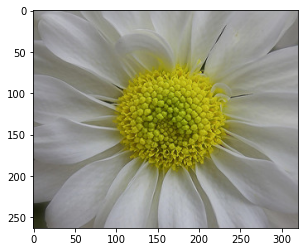

In [9]:
plt.imshow(para_img)

In [10]:
para_img.shape

(263, 320, 3)

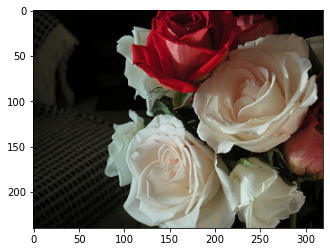

In [11]:
rose_path = train_path+'\\rose\\'+os.listdir(train_path+'\\rose')[1]
rose = imread(rose_path)
plt.imshow(rose)

In [12]:
image_shape = (250,250,3)

#### Create an image generator to read data from the folders and perform Image Augmentation

In [13]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

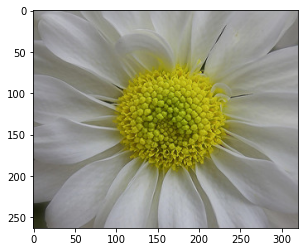

In [14]:
plt.imshow(para_img)

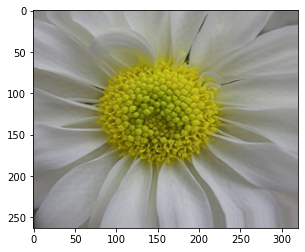

In [15]:
plt.imshow(image_gen.random_transform(para_img))

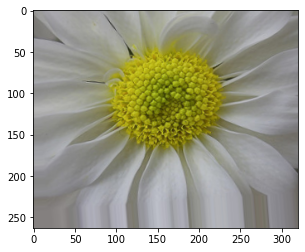

In [16]:
plt.imshow(image_gen.random_transform(para_img))

#### Creating a TensorFlow CNN model

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 119, 119, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 57, 57, 96)        55392     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 128)      

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

#### Creating a generator variable to load the training and testing data from the ImageDataGenerator

In [31]:
batch_size = 10

In [32]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3457 images belonging to 5 classes.


In [33]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 866 images belonging to 5 classes.


In [34]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

import warnings
warnings.filterwarnings('ignore')

#### Training the model and storing the data related to epochs in result variable

In [35]:
results = model.fit(train_image_gen,epochs=50,
                              validation_data=test_image_gen
                              ,callbacks=[early_stop]
                             )

Epoch 1/50
346/346 [==============================] - 46s 132ms/step - loss: 1.4484 - accuracy: 0.3442 - val_loss: 1.2754 - val_accuracy: 0.4376
Epoch 2/50
346/346 [==============================] - 50s 145ms/step - loss: 1.2838 - accuracy: 0.4371 - val_loss: 1.3864 - val_accuracy: 0.4515
Epoch 3/50
346/346 [==============================] - 55s 159ms/step - loss: 1.1673 - accuracy: 0.5221 - val_loss: 1.1099 - val_accuracy: 0.5508
Epoch 4/50
346/346 [==============================] - 60s 173ms/step - loss: 1.0898 - accuracy: 0.5762 - val_loss: 0.9724 - val_accuracy: 0.6224
Epoch 5/50
346/346 [==============================] - 63s 183ms/step - loss: 1.0083 - accuracy: 0.6199 - val_loss: 1.0057 - val_accuracy: 0.6085
Epoch 6/50
346/346 [==============================] - 66s 189ms/step - loss: 0.9754 - accuracy: 0.6228 - val_loss: 0.9660 - val_accuracy: 0.6259
Epoch 7/50
346/346 [==============================] - 67s 193ms/step - loss: 0.9442 - accuracy: 0.6474 - val_loss: 0.8805 - val_ac

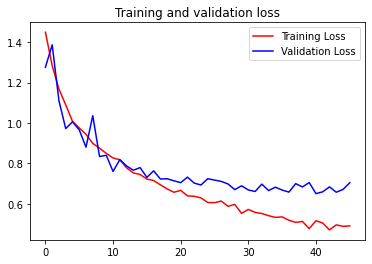

In [36]:
plot_history(results)

In [37]:
pred_probabilities = model.predict(test_image_gen)

In [38]:
prediction = []
for i in pred_probabilities:
    prediction.append(np.argmax(i, axis=0))

In [39]:
prediction = np.asarray(prediction)

#### The f1 scores for all the 5 classes

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       154
           1       0.75      0.86      0.80       211
           2       0.77      0.51      0.61       157
           3       0.85      0.78      0.82       147
           4       0.67      0.82      0.74       197

    accuracy                           0.76       866
   macro avg       0.77      0.75      0.75       866
weighted avg       0.76      0.76      0.75       866



In [41]:
model.save('flower-recognition.h5')